In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']


X = df[feature_cols]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
y_train.value_counts()

0    370
1    206
Name: Outcome, dtype: int64

In [3]:
(len(y_train))/len(y)

0.75

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
y_pred = logreg.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


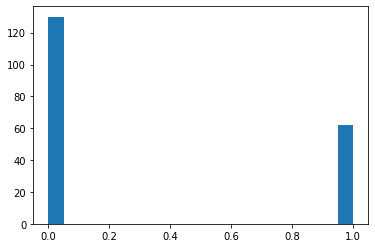

0    130
1     62
Name: Outcome, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

plt.hist(y_test, bins=20)
plt.show()

y_test_pd_series = pd.Series(y_test)
y_test_pd_series.value_counts()

In [7]:
import numpy as np

def comp_yt_yp(y_test, y_predict):
    conf_matrix  = np.zeros((2, 2))
    for m in [0, 1]:
        for n in [0, 1]:
            c = 0
            for (i, j) in zip(y_test, y_predict):
                if (i == m) & (j == n):
                        c += 1
            conf_matrix[m, n] = c 
    return conf_matrix

print(comp_yt_yp(y_test, y_pred))

[[114.  16.]
 [ 46.  16.]]


In [ ]:
def acc_prec_recall_F1(conf_mat):
    acc = (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][0]+conf_mat[1][1]+conf_mat[0][1]+conf_mat[1][0])
    prec = ()